In [1]:
# load data
import pickle

## load original dataset, a-Al2O3 fully clad in SiO2
sweep_dir_clad = '/home/dodd/data/wg_disp/wgparams_sweep_Al2O3_SiO2_2020_03_02_17_04_42/'
with open(sweep_dir_clad+'metadata.dat', 'rb') as f:
    params = pickle.load(f,)
ds = np.load(sweep_dir_clad+"data.npy",allow_pickle=True)[()]

## load "suspended" (fully air clad) dataset
sweep_dir_mgf2 = '/home/dodd/data/wg_disp/wgparams_sweep_Al2O3_MgF2_2020_03_06_07_42_13/'
with open(sweep_dir_mgf2+'metadata.dat', 'rb') as f:
    params_mgf2 = pickle.load(f,)
ds_mgf2 = np.load(sweep_dir_mgf2+"data.npy",allow_pickle=True)[()]

## load "fully MgF2 clad" dataset
sweep_dir_air = '/home/dodd/data/wg_disp/wgparams_sweep_Al2O3_Air_2020_03_04_01_48_15/'
with open(sweep_dir_air+'metadata.dat', 'rb') as f:
    params_air = pickle.load(f,)
ds_air = np.load(sweep_dir_air+"data.npy",allow_pickle=True)[()]

## load "air clad with SiO2 substrate" dataset
sweep_dir_subsSiO2 = '/home/dodd/data/wg_disp/wgparams_sweep_Al2O3_SubsSiO2_2020_03_08_09_54_18/'
with open(sweep_dir_subsSiO2+'metadata.dat', 'rb') as f:
    params_subsSiO2 = pickle.load(f,)
ds_subsSiO2 = np.load(sweep_dir_subsSiO2+"data.npy",allow_pickle=True)[()]


# # parameters copied from script
# ########### Parameters ###############
# ### swept parameters
# w_top_list = np.array([1200,1650,2000]) * u.nm
# λ_list = np.linspace(0.78,2.6,20)*u.um
# fact_list = [1.,0.95,1.05]
# ### fixed parameters
# t_core = 730*u.nm # core thickness
# t_etch = 730*u.nm # partial (or complete) etch depth

# ########## Simulation set up ##########
# (Xgrid, Ygrid) = (4, 2) # simulated region in μm
# n_points = 32
# n_bands  = 4
# res      = 64

# process

In [3]:
λ_list = params['λ_list']
w_top_list = params['w_top_list']
fact_list = params['λ_factor_list']

In [4]:
# define constants
π = np.pi
c = u.speed_of_light

# unload dataset
λ = np.outer(fact_list,λ_list.m) * λ_list.units
λ = λ.reshape(λ.shape+(1,1,1,))
dλ = λ[0] * 0.05


neff = ds['neff']
ng = ds['ng']

β = neff * 2*π / λ

# Compute β'(λ) and β''(λ)
# lam = np.outer([1, 2], lamList).reshape(2, 6, 1, 1, 1); dlam = lam * 0.05
β1_λ = (β[2] - β[1]) / (2 * dλ)
β2_λ = (β[2] + β[1] - 2*β[0]) / (dλ**2)
# Compute β'(k) and β''(k) (in SI units)  Since k = 2πc/λ and β'(k) = ng/c, these are given by:
#   β'(k)  = -(λ²/2πc) β'(λ)
#   β''(k) = -(λ²/2πc²) ng'(λ)
β1 = -λ**2/(2*π*c) * β1_λ
#beta2 = (lam**2/(2*np.pi*c))**2 * (beta2_lam + (2/lam) * beta1_lam)
β2 = -λ**2/(2*π*c**2) * (ng[2] - ng[1]) / (2*dλ)
D = ( ( 1 / c )  * (ng[2] - ng[1]) / (2*dλ) ).to(u.ps / u.nm / u.km)
ds['D'] = D



# same for air-clad data

neff_air = ds_air['neff']
ng_air = ds_air['ng']

β_air = neff_air * 2*π / λ

# Compute β'(λ) and β''(λ)
# lam = np.outer([1, 2], lamList).reshape(2, 6, 1, 1, 1); dlam = lam * 0.05
β1_λ_air = (β_air[2] - β_air[1]) / (2 * dλ)
β2_λ_air = (β_air[2] + β_air[1] - 2*β_air[0]) / (dλ**2)
# Compute β'(k) and β''(k) (in SI units)  Since k = 2πc/λ and β'(k) = ng/c, these are given by:
#   β'(k)  = -(λ²/2πc) β'(λ)
#   β''(k) = -(λ²/2πc²) ng'(λ)
β1_air = -λ**2/(2*π*c) * β1_λ_air
#beta2 = (lam**2/(2*np.pi*c))**2 * (beta2_lam + (2/lam) * beta1_lam)
β2_air = -λ**2/(2*π*c**2) * (ng_air[2] - ng_air[1]) / (2*dλ)
D_air = ( ( 1 / c )  * (ng_air[2] - ng_air[1]) / (2*dλ) ).to(u.ps / u.nm / u.km)
ds_air['D'] = D_air


# same for mgf2-clad data

neff_mgf2 = ds_mgf2['neff']
ng_mgf2 = ds_mgf2['ng']

β_mgf2 = neff_mgf2 * 2*π / λ

# Compute β'(λ) and β''(λ)
# lam = np.outer([1, 2], lamList).reshape(2, 6, 1, 1, 1); dlam = lam * 0.05
β1_λ_mgf2 = (β_mgf2[2] - β_mgf2[1]) / (2 * dλ)
β2_λ_mgf2 = (β_mgf2[2] + β_mgf2[1] - 2*β_mgf2[0]) / (dλ**2)
# Compute β'(k) and β''(k) (in SI units)  Since k = 2πc/λ and β'(k) = ng/c, these are given by:
#   β'(k)  = -(λ²/2πc) β'(λ)
#   β''(k) = -(λ²/2πc²) ng'(λ)
β1_mgf2 = -λ**2/(2*π*c) * β1_λ_mgf2
#beta2 = (lam**2/(2*np.pi*c))**2 * (beta2_lam + (2/lam) * beta1_lam)
β2_mgf2 = -λ**2/(2*π*c**2) * (ng_mgf2[2] - ng_mgf2[1]) / (2*dλ)
D_mgf2 = ( ( 1 / c )  * (ng_mgf2[2] - ng_mgf2[1]) / (2*dλ) ).to(u.ps / u.nm / u.km)
ds_mgf2['D'] = D_mgf2

# same for subsSiO2 data

neff_subsSiO2 = ds_subsSiO2['neff']
ng_subsSiO2 = ds_subsSiO2['ng']

β_subsSiO2 = neff_subsSiO2 * 2*π / λ

# Compute β'(λ) and β''(λ)
# lam = np.outer([1, 2], lamList).reshape(2, 6, 1, 1, 1); dlam = lam * 0.05
β1_λ_subsSiO2 = (β_subsSiO2[2] - β_subsSiO2[1]) / (2 * dλ)
β2_λ_subsSiO2 = (β_subsSiO2[2] + β_subsSiO2[1] - 2*β_subsSiO2[0]) / (dλ**2)
# Compute β'(k) and β''(k) (in SI units)  Since k = 2πc/λ and β'(k) = ng/c, these are given by:
#   β'(k)  = -(λ²/2πc) β'(λ)
#   β''(k) = -(λ²/2πc²) ng'(λ)
β1_subsSiO2 = -λ**2/(2*π*c) * β1_λ_subsSiO2
#beta2 = (lam**2/(2*np.pi*c))**2 * (beta2_lam + (2/lam) * beta1_lam)
β2_subsSiO2 = -λ**2/(2*π*c**2) * (ng_subsSiO2[2] - ng_subsSiO2[1]) / (2*dλ)
D_subsSiO2 = ( ( 1 / c )  * (ng_subsSiO2[2] - ng_subsSiO2[1]) / (2*dλ) ).to(u.ps / u.nm / u.km)
ds_subsSiO2['D'] = D_subsSiO2

# Plots

## SiO2-clad dispersion

In [5]:
# SiO2-clad dispersion plot params
θ_ind = 1
t_ind = 9
λ_ind_x_prof = 5
w_ind_x_prof = 8
cmap = cm.viridis
cm_xprof = cm.magma

λ_min = 0.3 # μm
λ_max = 1.85 # μm

ylim00 = 1.4,1.95
ylim01 = -1000,600

d = ds
p = params

figsize=(13,8)
wspace=0.5
hspace=0.5

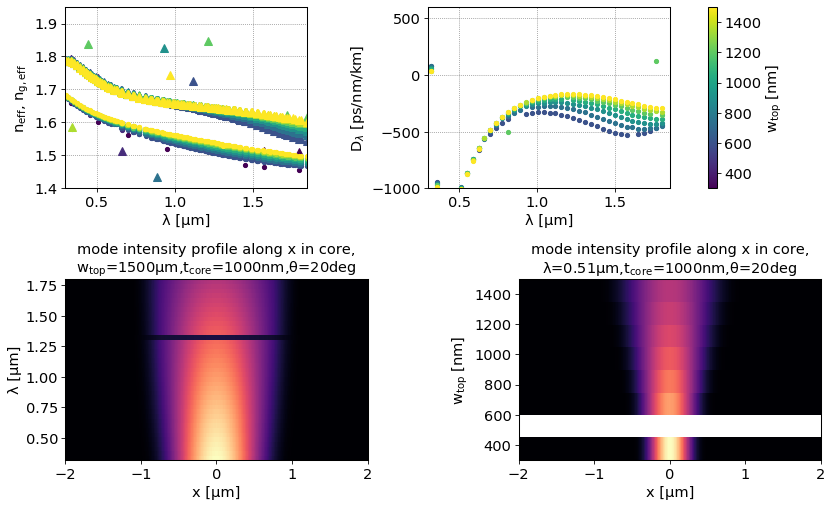

In [6]:
# plot SiO2-clad dispersion 

fig,ax = plt.subplots(2,
                      2,
                      figsize=figsize,
                      gridspec_kw={'wspace':wspace,'hspace':hspace},
                     )

norm = Normalize(p['w_top_list'].min().m,p['w_top_list'].max().m)
sm = cm.ScalarMappable(norm, cmap)
sm.set_array([])

Δx = p['Xgrid']
nx = d['p_mat_core_x'].shape[-1]
dx = Δx / nx
x = np.linspace(-Δx/2., Δx/2., nx)

for wind,ww in enumerate(w_top_list):
#     color = f'C{wind}'
    color=cmap(norm(ww.m))
    label = f'{int(w_top_list[wind].to(u.um).m)} μm'
    for fact_ind,fact in enumerate(fact_list):
        ax[0,0].plot(fact*λ_list.to(u.um).m,d['neff'][fact_ind,:,wind][:,t_ind,θ_ind],'.',color=color)
        ax[0,0].plot(fact*λ_list.to(u.um).m,d['ng'][fact_ind,:,wind][:,t_ind,θ_ind],'^',color=color)
    ax[0,1].plot(λ_list.to(u.um).m,d['D'][:,wind][:,t_ind,θ_ind].m,'.',color=color,label=label)
    
for a in ax[0]:
    a.set_xlim([λ_min,λ_max])
    a.set_xlabel('λ [μm]')
    
ax[0,0].set_ylabel('n$_\mathrm{eff}$, n$_\mathrm{g,eff}$')
# ax[1].set_ylabel('n$_\mathrm{g,eff}$')
ax[0,1].set_ylabel('D$_{λ}$ [ps/nm/km]')


ax[0,0].set_ylim(ylim00)
ax[0,1].set_ylim(ylim01)

cb = plt.colorbar(sm,ax=ax[0],label='w$_\mathrm{top}$ [nm]')

z = d['p_mat_core_x'][0,:,w_ind_x_prof,t_ind,θ_ind,:]
y = p['λ_list'].to(u.um).m
ax[1,0].pcolormesh(x,y,z,cmap=cm_xprof)
ax[1,0].set_ylabel('λ [μm]')
param_str = "w$_\mathrm{top}$"+f"={p['w_top_list'][w_ind_x_prof].to(u.nm).m:4.0f}μm,"+"t$_\mathrm{core}$"+f"={p['t_core_list'][t_ind].to(u.nm).m:4.0f}nm,θ={p['θ_list'][θ_ind]:2.0f}deg"
ax[1,0].set_title('mode intensity profile along x in core,\n'+param_str)


z = d['p_mat_core_x'][0,λ_ind_x_prof,:,t_ind,θ_ind,:]
y = p['w_top_list'].to(u.nm).m 
ax[1,1].pcolormesh(x,y,z,cmap=cm_xprof)
ax[1,1].set_ylabel('w$_\mathrm{top}$ [nm]')
param_str = f"λ={p['λ_list'][λ_ind_x_prof].to(u.um).m:2.2f}μm,"+"t$_\mathrm{core}$"+f"={p['t_core_list'][t_ind].to(u.nm).m:4.0f}nm,θ={p['θ_list'][θ_ind]:2.0f}deg"
ax[1,1].set_title('mode intensity profile along x in core,\n'+param_str)

for a in ax[1]:
    a.set_xlabel('x [μm]')

## unencapsulated (air above) with SiO2 substrate

In [21]:
# SiO2 substrate dispersion plot params
θ_ind = 0
t_ind = 7
λ_ind_x_prof = 8
w_ind_x_prof = 8
cmap = cm.viridis
cm_xprof = cm.magma

λ_min = 0.3 # μm
λ_max = 1.85 # μm

ylim00 = 1.4,1.95
ylim01 = -1000,600

d = ds_subsSiO2
p = params_subsSiO2

figsize=(13,8)
wspace=0.5
hspace=0.5

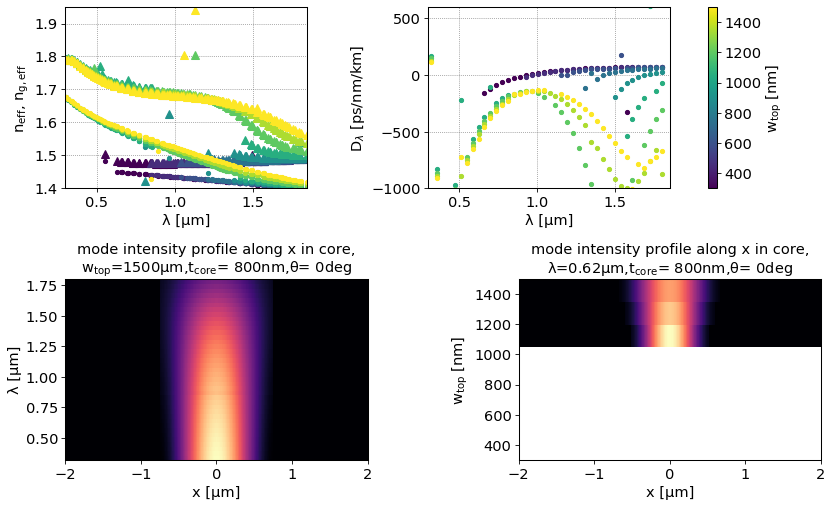

In [22]:
# plot SiO2 substrate (unencapsulated) dispersion 

fig,ax = plt.subplots(2,
                      2,
                      figsize=figsize,
                      gridspec_kw={'wspace':wspace,'hspace':hspace},
                     )

norm = Normalize(p['w_top_list'].min().m,p['w_top_list'].max().m)
sm = cm.ScalarMappable(norm, cmap)
sm.set_array([])

Δx = p['Xgrid']
nx = d['p_mat_core_x'].shape[-1]
dx = Δx / nx
x = np.linspace(-Δx/2., Δx/2., nx)

for wind,ww in enumerate(w_top_list):
#     color = f'C{wind}'
    color=cmap(norm(ww.m))
    label = f'{int(w_top_list[wind].to(u.um).m)} μm'
    for fact_ind,fact in enumerate(fact_list):
        ax[0,0].plot(fact*λ_list.to(u.um).m,d['neff'][fact_ind,:,wind][:,t_ind,θ_ind],'.',color=color)
        ax[0,0].plot(fact*λ_list.to(u.um).m,d['ng'][fact_ind,:,wind][:,t_ind,θ_ind],'^',color=color)
    ax[0,1].plot(λ_list.to(u.um).m,d['D'][:,wind][:,t_ind,θ_ind].m,'.',color=color,label=label)
    
for a in ax[0]:
    a.set_xlim([λ_min,λ_max])
    a.set_xlabel('λ [μm]')
    
ax[0,0].set_ylabel('n$_\mathrm{eff}$, n$_\mathrm{g,eff}$')
# ax[1].set_ylabel('n$_\mathrm{g,eff}$')
ax[0,1].set_ylabel('D$_{λ}$ [ps/nm/km]')


ax[0,0].set_ylim(ylim00)
ax[0,1].set_ylim(ylim01)

cb = plt.colorbar(sm,ax=ax[0],label='w$_\mathrm{top}$ [nm]')

z = d['p_mat_core_x'][0,:,w_ind_x_prof,t_ind,θ_ind,:]
y = p['λ_list'].to(u.um).m
ax[1,0].pcolormesh(x,y,z,cmap=cm_xprof)
ax[1,0].set_ylabel('λ [μm]')
param_str = "w$_\mathrm{top}$"+f"={p['w_top_list'][w_ind_x_prof].to(u.nm).m:4.0f}μm,"+"t$_\mathrm{core}$"+f"={p['t_core_list'][t_ind].to(u.nm).m:4.0f}nm,θ={p['θ_list'][θ_ind]:2.0f}deg"
ax[1,0].set_title('mode intensity profile along x in core,\n'+param_str)


z = d['p_mat_core_x'][0,λ_ind_x_prof,:,t_ind,θ_ind,:]
y = p['w_top_list'].to(u.nm).m 
ax[1,1].pcolormesh(x,y,z,cmap=cm_xprof)
ax[1,1].set_ylabel('w$_\mathrm{top}$ [nm]')
param_str = f"λ={p['λ_list'][λ_ind_x_prof].to(u.um).m:2.2f}μm,"+"t$_\mathrm{core}$"+f"={p['t_core_list'][t_ind].to(u.nm).m:4.0f}nm,θ={p['θ_list'][θ_ind]:2.0f}deg"
ax[1,1].set_title('mode intensity profile along x in core,\n'+param_str)

for a in ax[1]:
    a.set_xlabel('x [μm]')

## MgF2-clad dispersion

In [26]:
# MgF2-clad dispersion plot params
θ_ind = 1
t_ind = 9
λ_ind_x_prof = 3
w_ind_x_prof = 8
cmap = cm.viridis
cm_xprof = cm.magma

λ_min = 0.3 # μm
λ_max = 1.85 # μm

ylim00 = 1.4,2.0
ylim01 = -1000,600

d = ds_mgf2
p = params_mgf2

figsize=(13,8)
wspace=0.5
hspace=0.5

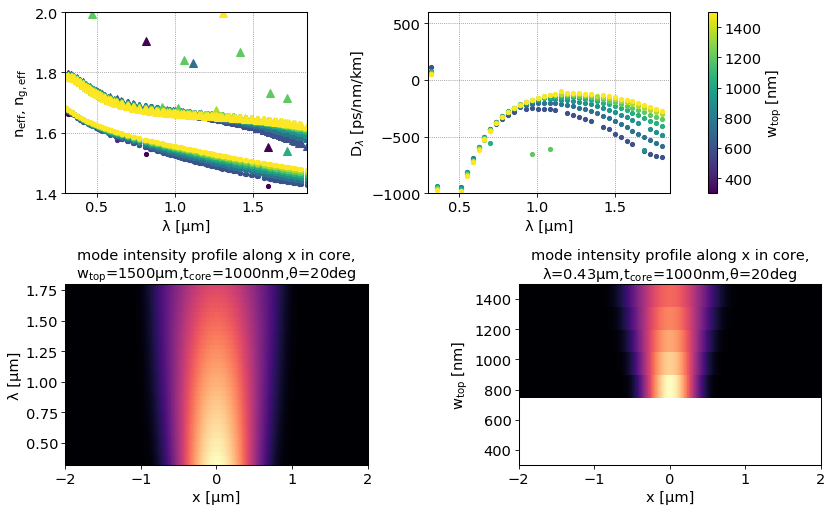

In [27]:
# plot MgF2-clad dispersion 

fig,ax = plt.subplots(2,
                      2,
                      figsize=figsize,
                      gridspec_kw={'wspace':wspace,'hspace':hspace},
                     )

norm = Normalize(p['w_top_list'].min().m,p['w_top_list'].max().m)
sm = cm.ScalarMappable(norm, cmap)
sm.set_array([])

Δx = p['Xgrid']
nx = d['p_mat_core_x'].shape[-1]
dx = Δx / nx
x = np.linspace(-Δx/2., Δx/2., nx)

for wind,ww in enumerate(w_top_list):
#     color = f'C{wind}'
    color=cmap(norm(ww.m))
    label = f'{int(w_top_list[wind].to(u.um).m)} μm'
    for fact_ind,fact in enumerate(fact_list):
        ax[0,0].plot(fact*λ_list.to(u.um).m,d['neff'][fact_ind,:,wind][:,t_ind,θ_ind],'.',color=color)
        ax[0,0].plot(fact*λ_list.to(u.um).m,d['ng'][fact_ind,:,wind][:,t_ind,θ_ind],'^',color=color)
    ax[0,1].plot(λ_list.to(u.um).m,d['D'][:,wind][:,t_ind,θ_ind].m,'.',color=color,label=label)
    
for a in ax[0]:
    a.set_xlim([λ_min,λ_max])
    a.set_xlabel('λ [μm]')
    
ax[0,0].set_ylabel('n$_\mathrm{eff}$, n$_\mathrm{g,eff}$')
# ax[1].set_ylabel('n$_\mathrm{g,eff}$')
ax[0,1].set_ylabel('D$_{λ}$ [ps/nm/km]')


ax[0,0].set_ylim(ylim00)
ax[0,1].set_ylim(ylim01)

cb = plt.colorbar(sm,ax=ax[0],label='w$_\mathrm{top}$ [nm]')

z = d['p_mat_core_x'][0,:,w_ind_x_prof,t_ind,θ_ind,:]
y = p['λ_list'].to(u.um).m
ax[1,0].pcolormesh(x,y,z,cmap=cm_xprof)
ax[1,0].set_ylabel('λ [μm]')
param_str = "w$_\mathrm{top}$"+f"={p['w_top_list'][w_ind_x_prof].to(u.nm).m:4.0f}μm,"+"t$_\mathrm{core}$"+f"={p['t_core_list'][t_ind].to(u.nm).m:4.0f}nm,θ={p['θ_list'][θ_ind]:2.0f}deg"
ax[1,0].set_title('mode intensity profile along x in core,\n'+param_str)


z = d['p_mat_core_x'][0,λ_ind_x_prof,:,t_ind,θ_ind,:]
y = p['w_top_list'].to(u.nm).m 
ax[1,1].pcolormesh(x,y,z,cmap=cm_xprof)
ax[1,1].set_ylabel('w$_\mathrm{top}$ [nm]')
param_str = f"λ={p['λ_list'][λ_ind_x_prof].to(u.um).m:2.2f}μm,"+"t$_\mathrm{core}$"+f"={p['t_core_list'][t_ind].to(u.nm).m:4.0f}nm,θ={p['θ_list'][θ_ind]:2.0f}deg"
ax[1,1].set_title('mode intensity profile along x in core,\n'+param_str)

for a in ax[1]:
    a.set_xlabel('x [μm]')

## Air-clad dispersion

In [22]:
# air-clad dispersion plot params
θ_ind = 0
t_ind = 5
λ_ind_x_prof = 5
w_ind_x_prof = 8
cmap = cm.viridis
cm_xprof = cm.magma

λ_min = 0.3 # μm
λ_max = 1.85 # μm

ylim00 = 1.35,1.85
ylim01 = -500,400

d = ds_air
p = params_air

figsize=(13,8)
wspace=0.5
hspace=0.5

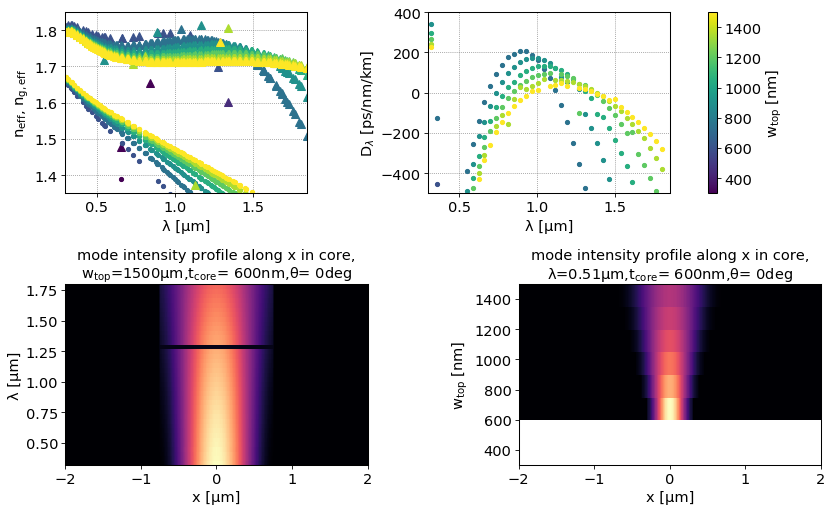

In [23]:
# plot air-clad dispersion 

fig,ax = plt.subplots(2,
                      2,
                      figsize=figsize,
                      gridspec_kw={'wspace':wspace,'hspace':hspace},
                     )

norm = Normalize(p['w_top_list'].min().m,p['w_top_list'].max().m)
sm = cm.ScalarMappable(norm, cmap)
sm.set_array([])

Δx = p['Xgrid']
nx = d['p_mat_core_x'].shape[-1]
dx = Δx / nx
x = np.linspace(-Δx/2., Δx/2., nx)

for wind,ww in enumerate(w_top_list):
#     color = f'C{wind}'
    color=cmap(norm(ww.m))
    label = f'{int(w_top_list[wind].to(u.um).m)} μm'
    for fact_ind,fact in enumerate(fact_list):
        ax[0,0].plot(fact*λ_list.to(u.um).m,d['neff'][fact_ind,:,wind][:,t_ind,θ_ind],'.',color=color)
        ax[0,0].plot(fact*λ_list.to(u.um).m,d['ng'][fact_ind,:,wind][:,t_ind,θ_ind],'^',color=color)
    ax[0,1].plot(λ_list.to(u.um).m,d['D'][:,wind][:,t_ind,θ_ind].m,'.',color=color,label=label)
    
for a in ax[0]:
    a.set_xlim([λ_min,λ_max])
    a.set_xlabel('λ [μm]')
    
ax[0,0].set_ylabel('n$_\mathrm{eff}$, n$_\mathrm{g,eff}$')
# ax[1].set_ylabel('n$_\mathrm{g,eff}$')
ax[0,1].set_ylabel('D$_{λ}$ [ps/nm/km]')


ax[0,0].set_ylim(ylim00)
ax[0,1].set_ylim(ylim01)

cb = plt.colorbar(sm,ax=ax[0],label='w$_\mathrm{top}$ [nm]')

z = d['p_mat_core_x'][0,:,w_ind_x_prof,t_ind,θ_ind,:]
y = p['λ_list'].to(u.um).m
ax[1,0].pcolormesh(x,y,z,cmap=cm_xprof)
ax[1,0].set_ylabel('λ [μm]')
param_str = "w$_\mathrm{top}$"+f"={p['w_top_list'][w_ind_x_prof].to(u.nm).m:4.0f}μm,"+"t$_\mathrm{core}$"+f"={p['t_core_list'][t_ind].to(u.nm).m:4.0f}nm,θ={p['θ_list'][θ_ind]:2.0f}deg"
ax[1,0].set_title('mode intensity profile along x in core,\n'+param_str)


z = d['p_mat_core_x'][0,λ_ind_x_prof,:,t_ind,θ_ind,:]
y = p['w_top_list'].to(u.nm).m 
ax[1,1].pcolormesh(x,y,z,cmap=cm_xprof)
ax[1,1].set_ylabel('w$_\mathrm{top}$ [nm]')
param_str = f"λ={p['λ_list'][λ_ind_x_prof].to(u.um).m:2.2f}μm,"+"t$_\mathrm{core}$"+f"={p['t_core_list'][t_ind].to(u.nm).m:4.0f}nm,θ={p['θ_list'][θ_ind]:2.0f}deg"
ax[1,1].set_title('mode intensity profile along x in core,\n'+param_str)

for a in ax[1]:
    a.set_xlabel('x [μm]')

# old

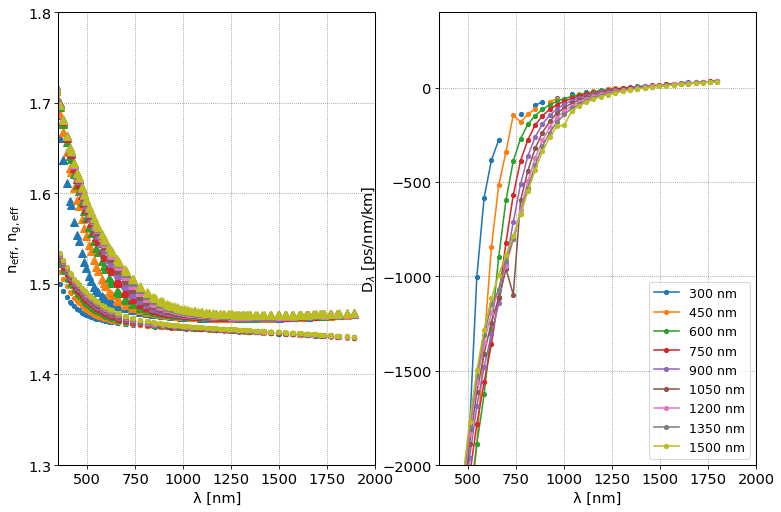

In [14]:
# plot dispersion 
fig,ax = plt.subplots(1,2,figsize=(12,8))

θ_ind = 0
t_ind = 0

for wind,ww in enumerate(w_top_list):
    color = f'C{wind}'
    label = f'{int(w_top_list[wind].to(u.nm).m)} nm'
    for fact_ind,fact in enumerate(fact_list):
        ax[0].plot(fact*λ_list.to(u.nm).m,ds['neff'][fact_ind,:,wind][:,t_ind,θ_ind],'.',color=color)
        ax[0].plot(fact*λ_list.to(u.nm).m,ds['ng'][fact_ind,:,wind][:,t_ind,θ_ind],'^',color=color)
    ax[1].plot(λ_list.to(u.nm).m,D[:,wind][:,t_ind,θ_ind].m,'.-',color=color,label=label)
    
for a in ax:
    a.set_xlabel('λ [nm]')
    
ax[0].set_ylabel('n$_\mathrm{eff}$, n$_\mathrm{g,eff}$')
# ax[1].set_ylabel('n$_\mathrm{g,eff}$')
ax[1].set_ylabel('D$_{λ}$ [ps/nm/km]')

ax[0].set_ylim([1.3,1.8])
ax[0].set_xlim([350,2000])

ax[1].set_ylim([-2000,400])
ax[1].set_xlim([350,2000])

ax[1].legend()

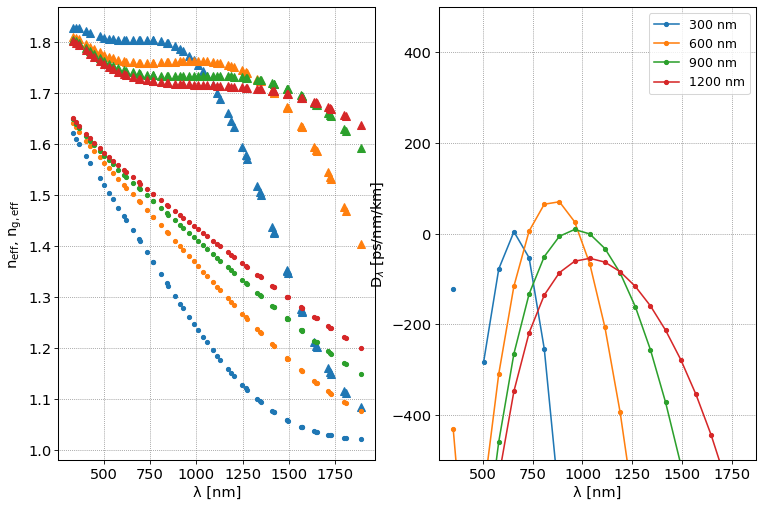

In [32]:
#  plot air-clad dispersion 
fig,ax = plt.subplots(1,2,figsize=(12,8))

labels = ['1200 nm','1650 nm','2000 nm']
#colors = ['C3','C2','darkblue']

θ_ind = 1
t_ind = 2

for wind,ww in enumerate(w_top_list):
    color = f'C{wind}'
    label = f'{int(w_top_list[wind].to(u.nm).m)} nm'
    for fact_ind,fact in enumerate(fact_list):
        ax[0].plot(fact*λ_list.to(u.nm).m,ds_air['neff'][fact_ind,:,wind][:,t_ind,θ_ind],'.',color=color)
        ax[0].plot(fact*λ_list.to(u.nm).m,ds_air['ng'][fact_ind,:,wind][:,t_ind,θ_ind],'^',color=color)
    ax[1].plot(λ_list.to(u.nm).m,D_air[:,wind][:,t_ind,θ_ind].m,'.-',color=color,label=label)
    
for a in ax:
    a.set_xlabel('λ [nm]')
    
ax[0].set_ylabel('n$_\mathrm{eff}$, n$_\mathrm{g,eff}$')
# ax[1].set_ylabel('n$_\mathrm{g,eff}$')
ax[1].set_ylabel('D$_{λ}$ [ps/nm/km]')

ax[1].set_ylim([-500,500])
# ax[1].set_xlim([800,2400])
ax[1].legend()

In [28]:
params['t_core_list']

array([ 100,  200,  500, 1000]) <Unit('nanometer')>

(800, 2400)

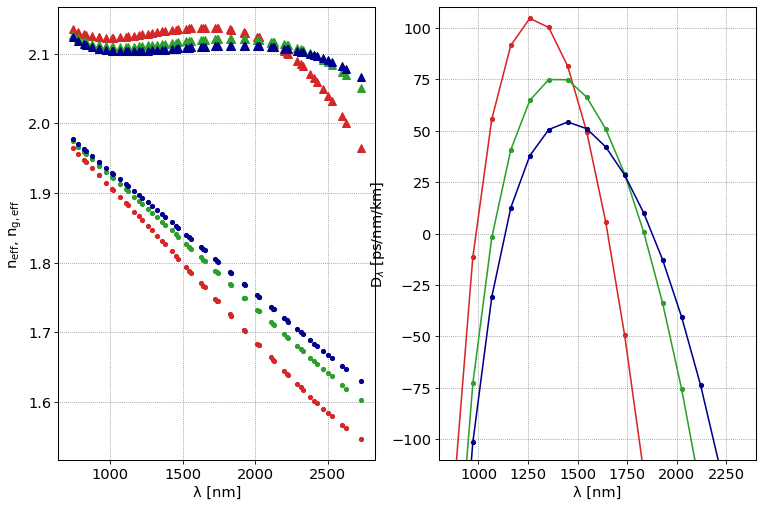

In [68]:
# 4x4 lattice, res = 64
fig,ax = plt.subplots(1,2,figsize=(12,8))

labels = ['1200 nm','1650 nm','2000 nm']
colors = ['C3','C2','darkblue']

for wind,ww in enumerate(w_top_list):
    color=colors[wind]
    for fact_ind,fact in enumerate(fact_list):
        ax[0].plot(fact*λ_list.to(u.nm).m,ds['neff'][fact_ind,:,wind],'.',color=color)
        ax[0].plot(fact*λ_list.to(u.nm).m,ds['ng'][fact_ind,:,wind],'^',color=color)
    ax[1].plot(λ[0].to(u.nm).m,D[:,wind].m,'.-',color=color,label=labels[wind])
    
for a in ax:
    a.set_xlabel('λ [nm]')
    
ax[0].set_ylabel('n$_\mathrm{eff}$, n$_\mathrm{g,eff}$')
# ax[1].set_ylabel('n$_\mathrm{g,eff}$')
ax[1].set_ylabel('D$_{λ}$ [ps/nm/km]')

ax[1].set_ylim([-110,110])
ax[1].set_xlim([800,2400])

In [69]:
test = {'blah': 2, 'wah': 1.}
'blah' in test.keys()

True

In [1]:
import sys
from pathlib import Path

### import index models ###
home = str( Path.home() )
nlo_dir = home+'/github/optics_modeling/NLO_tools'
if nlo_dir not in sys.path:
    sys.path.append(nlo_dir)
import NLO_tools as nlo

#u = nlo.u


In [2]:
#nlo.n_MgO_LN(λ*u.um,T,axis=axis)[0,0]

# T = 300 * u.degK
T = Q_(21,u.degC)
λ = (np.linspace(300,2000,300)*u.nm).to(u.um)
n_x = nlo.n_LBO(λ,T,axis='X').squeeze()
n_y = nlo.n_LBO(λ,T,axis='Y').squeeze()
n_z = nlo.n_LBO(λ,T,axis='Z').squeeze()


# numerical alternative to check

λ_ig_LBO = (7.78 * u.eV).to(u.um,'sp').m # ~ 159nm

# lbo_coeffs = [
#     [1.4426279, 1.0109932, .011210197, 1.2363218, 91, -127.70167e-6, 122.13435e-6, λ_ig_LBO],
#     [1.5014015, 1.0388217, .0121571, 1.7567133, 91, 373.3387e-6, -415.10435e-6, λ_ig_LBO],
#     [1.448924, 1.1365228, .011676746, 1.5830069, 91, -446.95031e-6, 419.33410e-6, λ_ig_LBO] ]

lbo_coeffs = [
    [1.4426279, 1.0109932, .011210197, 1.2363218, 91, -127.70167e-6, 122.13435e-6, 53.0e-3],
    [1.5014015, 1.0388217, .0121571, 1.7567133, 91, 373.3387e-6, -415.10435e-6, 32.7e-3],
    [1.448924, 1.1365228, .011676746, 1.5830069, 91, -446.95031e-6, 419.33410e-6, 43.5e-3]]

def n_sq_num(lm,T,A,B,C,D,E,G,H,lmig):
    n_rt = np.sqrt(  A + B * lm**2 / ( lm**2 - C ) + D * lm**2 / ( lm**2 - E ) ) # 'rt' refers to room temperature
    R = lm**2 / ( lm**2 - lmig**2 )
    dndT = ( G * R + H * R**2 ) / ( 2 * n_rt  )
    n_sq = ( n_rt + dndT * (T - 20) )**2  # T in Celsius
    return n_sq

def dndT_2n_num(lm,A,B,C,D,E,G,H,lmig):
    R = lm**2 / ( lm**2 - lmig**2 )
    print(f'G: {G}')
    print(f'H: {H}')
    print(f'lmig: {lmig}')
    return ( G * R ) + ( H * R**2 )

def n_x_num(lm,T=20.): return np.sqrt(n_sq_num(lm,T,*lbo_coeffs[0]))
def n_y_num(lm,T=20.): return np.sqrt(n_sq_num(lm,T,*lbo_coeffs[1]))
def n_z_num(lm,T=20.): return np.sqrt(n_sq_num(lm,T,*lbo_coeffs[2]))

def dndT_2n_x_num(lm): return dndT_2n_num(lm,*lbo_coeffs[0])
def dndT_2n_y_num(lm): return dndT_2n_num(lm,*lbo_coeffs[1])
def dndT_2n_z_num(lm): return dndT_2n_num(lm,*lbo_coeffs[2])


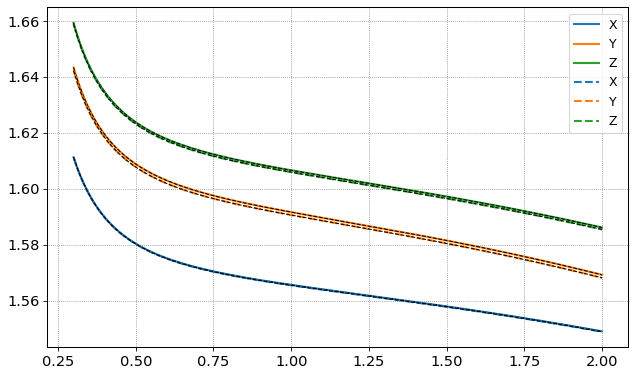

In [4]:
fig,ax = plt.subplots(1,1)

T = Q_(20,u.degC) 
n_x = nlo.n_LBO(λ,T,axis='X').squeeze()
n_y = nlo.n_LBO(λ,T,axis='Y').squeeze()
n_z = nlo.n_LBO(λ,T,axis='Z').squeeze()

ax.plot(λ.m,n_x,'C0',label='X',lw=2)
ax.plot(λ.m,n_y,'C1',label='Y',lw=2)
ax.plot(λ.m,n_z,'C2',label='Z',lw=2)

ax.plot(λ.m,n_x_num(λ.to(u.um).m,T=20),'k--',lw=1)
ax.plot(λ.m,n_y_num(λ.to(u.um).m,T=20),'k--',lw=1)
ax.plot(λ.m,n_z_num(λ.to(u.um).m,T=20),'k--',lw=1)

T = Q_(100,u.degC) 
n_x = nlo.n_LBO(λ,T,axis='X').squeeze()
n_y = nlo.n_LBO(λ,T,axis='Y').squeeze()
n_z = nlo.n_LBO(λ,T,axis='Z').squeeze()

ax.plot(λ.m,n_x,'C0--',label='X',lw=2)
ax.plot(λ.m,n_y,'C1--',label='Y',lw=2)
ax.plot(λ.m,n_z,'C2--',label='Z',lw=2)

ax.plot(λ.m,n_x_num(λ.to(u.um).m,T=100),'k--',lw=1)
ax.plot(λ.m,n_y_num(λ.to(u.um).m,T=100),'k--',lw=1)
ax.plot(λ.m,n_z_num(λ.to(u.um).m,T=100),'k--',lw=1)

ax.legend()


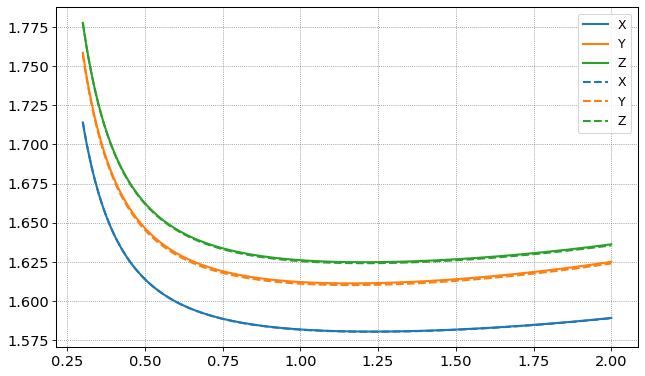

In [5]:
fig,ax = plt.subplots(1,1)

T = Q_(20,u.degC) 
ng_x = nlo.n_g_LBO(λ,T,axis='X').squeeze()
ng_y = nlo.n_g_LBO(λ,T,axis='Y').squeeze()
ng_z = nlo.n_g_LBO(λ,T,axis='Z').squeeze()

ax.plot(λ.m,ng_x,'C0',label='X',lw=2)
ax.plot(λ.m,ng_y,'C1',label='Y',lw=2)
ax.plot(λ.m,ng_z,'C2',label='Z',lw=2)


T = Q_(100,u.degC) 
ng_x = nlo.n_g_LBO(λ,T,axis='X').squeeze()
ng_y = nlo.n_g_LBO(λ,T,axis='Y').squeeze()
ng_z = nlo.n_g_LBO(λ,T,axis='Z').squeeze()

ax.plot(λ.m,ng_x,'C0--',label='X',lw=2)
ax.plot(λ.m,ng_y,'C1--',label='Y',lw=2)
ax.plot(λ.m,ng_z,'C2--',label='Z',lw=2)

ax.legend()


(-200, 200)

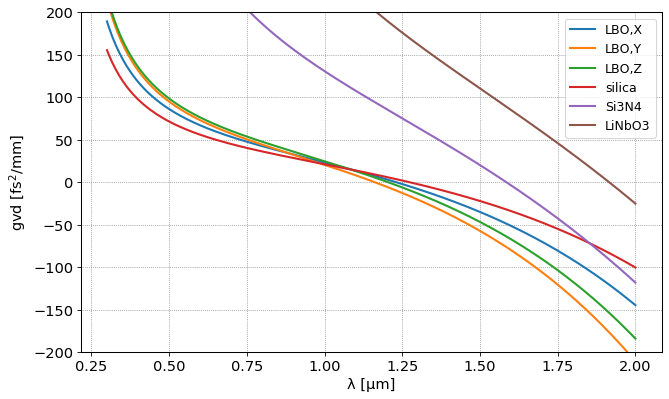

In [15]:
fig,ax = plt.subplots(1,1)

T = Q_(20,u.degC) 
gvd_x = nlo.gvd_LBO(λ,T,axis='X').squeeze()
gvd_y = nlo.gvd_LBO(λ,T,axis='Y').squeeze()
gvd_z = nlo.gvd_LBO(λ,T,axis='Z').squeeze()

ax.plot(λ.m,gvd_x.m,'C0',label='LBO,X',lw=2)
ax.plot(λ.m,gvd_y.m,'C1',label='LBO,Y',lw=2)
ax.plot(λ.m,gvd_z.m,'C2',label='LBO,Z',lw=2)

gvd_sio2 = nlo.gvd_SiO2(λ,T).squeeze()
ax.plot(λ.m,gvd_sio2.m,'C3',label='silica',lw=2)

gvd_si3n4 = nlo.gvd_Si3N4(λ,T).squeeze()
ax.plot(λ.m,gvd_si3n4.m,'C4',label='Si3N4',lw=2)

gvd_linbo3 = nlo.gvd_MgO_LN(λ,T).squeeze()
ax.plot(λ.m,gvd_linbo3.m,'C5',label='LiNbO3',lw=2)

ax.legend()
ax.set_xlabel('λ [μm]')
ax.set_ylabel('gvd [fs$^2$/mm]')
ax.set_ylim([-200,200])

# Notes

In [1]:
##### hogwarts servers #####

# at res=128, Xgrid=Ygrid=4,n_proc=16,nice=19 for a-Al2O3 on MgF2 substrate I find the simulation rate on hogwarts1 to be ~
# (( 8 * u.hour )/ 4512).to(u.second) # 6.4 seconds per simulation

# at res=64, Xgrid=Ygrid=4,n_proc=16,nice=19 for a-Al2O3 on SiO2 substrate I find the simulation rate on hogwarts1 to be ~
# (( 30 * u.minute )/ 935).to(u.second) # 1.92 seconds per simulation

# at res=64, Xgrid=Ygrid=4,n_proc=32,nice=19 for a-Al2O3 on SiO2 substrate I find the simulation rate on hogwarts1 to be ~
# (( 2*u.hour + 14 * u.minute )/ 5245).to(u.second) # 1.53 seconds per simulation

# at res=64, Xgrid=Ygrid=4,n_proc=32,nice=19 for a-Al2O3 on SiO2 substrate I find the simulation rate on hogwarts1 to be ~
# (( 2*u.hour + 9 * u.minute )/ 5400).to(u.second) # 1.43 seconds per simulation

##### my computer #####

# at res=64, Xgrid=4,Ygrid=6,n_proc=6,nice=19 for a-Al2O3 on MgF2 substrate I find the simulation rate on dodd-laptop to be ~
# (( 2 * u.hour )/ 2023).to(u.second) # 3.56 seconds per simulation

# at res=64, Xgrid=4,Ygrid=6,n_proc=12,nice=19 for a-Al2O3 on MgF2 substrate I find the simulation rate on dodd-laptop to be ~
# (( 2*u.hour + 43 * u.minute )/ 3720).to(u.second) # 2.63 seconds per simulation

1.4333333333333333 <Unit('second')>

In [41]:
(1.53 * u.second * 21000).to(u.hour)

8.925 <Unit('hour')>